In [2]:
from PIL import Image, ImageDraw, ImageFilter, ImageOps
import numpy as np
import sys
from scipy.signal import find_peaks
from scipy import fftpack
import matplotlib.pyplot as plt
from skimage.restoration import unwrap_phase
np.set_printoptions(threshold=sys.maxsize)

In [3]:
img = Image.open("bubble_attempt1.tif")
#img = ImageOps.posterize(img, 2).rotate(9)

In [4]:
img.show()

/home/fnovotny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


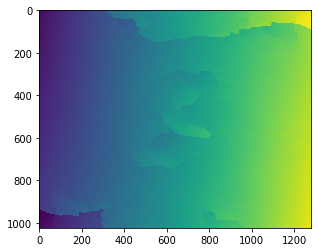

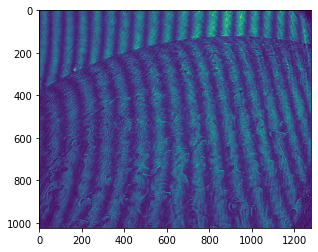

In [6]:
# fourier transform and fftshift
img_fft = fftpack.fftshift(fftpack.fft2(img))
# size of image
s1, s2 = np.array(img).shape
maximum_loc = np.unravel_index(img_fft.argmax(), img_fft.shape)
#cut off radius - adjustable
r = 30
img_fft2 = img_fft[:,0:(maximum_loc[1]-r)]
row, col = np.unravel_index(np.argsort(img_fft2.ravel()),img_fft2.shape)
secondary_max = (row[::-1][1], col[::-1][1])
x, y = img_fft.shape
img_fft3 = img_fft.copy()
for i in range(x):
    for j in range(y):
        if ((i-r-secondary_max[0])**2+(j-r-secondary_max[1])**2) >= r**2:
            img_fft3[i,j]=0
final_fft = np.zeros((s1, s2))
# secondary max fourier 
final_fft[round(s1/2-r):round(s1/2+r),round(s2/2-r):round(s2/2+r)] = img_fft3[(secondary_max[0]-r):(secondary_max[0]+r),(secondary_max[1]-r):(secondary_max[1]+r)]
im_new = fftpack.ifft2(fftpack.fftshift(final_fft))
phase = unwrap_phase(np.angle(im_new),  wrap_around=(True, False))
plt.imshow(phase)
plt.show()
plt.imshow(img)
plt.show()

In [7]:
kernel = np.ones((10,10),np.float32)/100
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

NameError: name 'cv2' is not defined

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('./bubble_attempt1.tif',0)
img = Image.fromarray(fftpack.ifft2(fftpack.fftshift(img_fft3)).real)
edges = cv2.Canny(img,90, 150)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

TypeError: Canny() missing required argument 'threshold2' (pos 4)

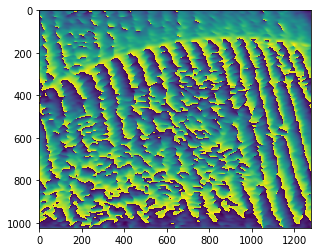

In [8]:
#secondary peak after bypass filtering
plt.imshow(np.angle(fftpack.ifft2(fftpack.fftshift(img_fft3))))

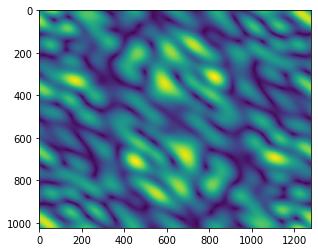

In [10]:
plt.imshow(np.abs(im_new))

In [69]:
img = Image.open("flame3-2.tif")
#img = ImageOps.posterize(img, 2).rotate(9)

/home/fnovotny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


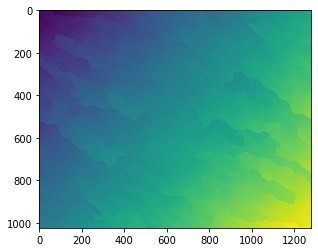

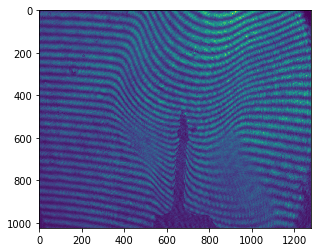

In [72]:
from skimage.restoration import unwrap_phase
img_fft = fftpack.fftshift(fftpack.fft2(img))
s1, s2 = np.array(img).shape
maximum_loc = np.unravel_index(im_fft.argmax(), im_fft.shape)
# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
r = 35
img_fft2 = im_fft[:,0:(maximum_loc[1]-r)]
row, col = np.unravel_index(np.argsort(img_fft2.ravel()),img_fft2.shape)
secondary_max = (row[::-1][1], col[::-1][1])
x, y = im_fft.shape
img_fft3 = img_fft.copy()
for i in range(x):
    for j in range(y):
        if ((i-r-secondary_max[0])**2+(j-r-secondary_max[1])**2) >= r**2:
            img_fft3[i,j]=0
final_fft = np.zeros((s1, s2))
final_fft[round(s1/2-r):round(s1/2+r),round(s2/2-r):round(s2/2+r)] = img_fft3[(secondary_max[0]-r):(secondary_max[0]+r),(secondary_max[1]-r):(secondary_max[1]+r)]
im_new = fftpack.ifft2(fftpack.fftshift(final_fft))
phase2 = unwrap_phase(np.angle(im_new),  wrap_around=(False, False))
plt.imshow(phase2)
plt.show()
plt.imshow(img)
plt.show()

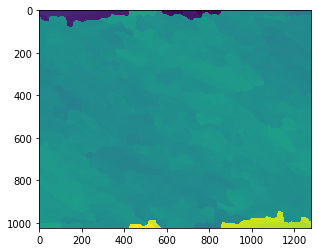

In [71]:
plt.imshow(phase2-phase)

In [60]:
img.load()
width, height = img.size
r_array = np.empty([0,width])
pix_array = np.empty([0,width])

In [ ]:
def fit_rotate(angle):
    

In [75]:
new_img = ImageDraw.Draw(img)
peaks = []
fringes = np.zeros((width, height))
for i in range(height):
    row = []
    for j in range(width):
         row.append(img.getpixel((j, i)))
    peak, _ = find_peaks(row)
    peaks.append(np.array(peak)[np.newaxis].transpose())
    fringes[peak, i] = 1

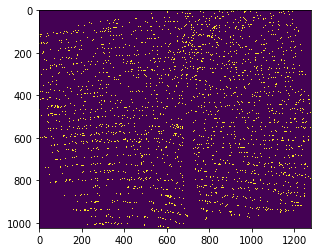

In [94]:
import matplotlib.pyplot as plt
plt.imshow(fringes.T)
fringes_better = np.zeros((width, height))
for h in range(fringes.shape[1]):
    row = fringes[:, h]
    if sum(row)>50:
        fringes_better[:,h] = np.ones(width)
plt.show()

In [11]:
def find_fringes(size, test_freq, gray, white_level, dark_level, margin):
        ly=[]      # whole row
        lblack= [] # px <10
        lmiddle=[] # coordinates
        llenmidd=[]
        lallmiddles=[]

        j=0
        for py in range(size[0]):  # y direction
            if py%test_freq==0:
                k=0
                l=0
                for px in range(size[1]): #x direction
                    l+=1
                    ly.append(gray[px,py])
                    if gray[px,py]>white_level and px>margin and px < size[0]-margin: #check sides
                        lblack.append(px)
                    
                    if (gray[px,py]<dark_level and gray[px,py-1]<dark_level):  #3px to side
                        if len(lblack)>2:  
                            pxmid = lblack[len(lblack)/2]
                            lmiddle.append(pxmid)
                            k+=1  
                            #cv.Circle(gray,(pxmid,py),2,(255,0,0),2)	
                            lblack=[]    
                j+=1
                llenmidd.append(len(lmiddle))
                lallmiddles.append(lmiddle)
                lmiddle=[]             
        avarage_len = sum(llenmidd)/len(llenmidd)
        return lallmiddles[len(lallmiddles)/2]
        #return avarage_len, llenmidd ,lallmiddles
    